In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers

In [2]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
df = pd.read_csv('Labeled Data/data_labelling_subs - Copy.csv', header=0)
#df = df.iloc[2:]
#df1 = df.tail(-2)
df1 = df[['title', 'upvotes', 'downvotes', 'score', 'label']]
df1

,title,upvotes,downvotes,score,label
0,He's been planning this for a long time,4012,82,4094,1
1,More Committed Than Ever to Making Twitter 2.0...,2,2,4,2
2,Chad Karen.,2014,129,2143,1
3,HAHAHA LEGEND!,2778,86,2864,2
4,Ai Elon is Sentient.,306,46,352,1
...,...,...,...,...,...
195,Truth.,2890,59,2949,1
196,Farm livin’ is the life for me,1467,15,1482,1
197,Pop one,2516,105,2621,1
198,Elon may be actually able to build his own pho...,0,0,0,2


In [4]:
from sklearn.model_selection import train_test_split

#X = data.drop('class', axis=1)
#X = df1[['title', 'upvotes', 'downvotes', 'score', 'label']]
X = df1['title']
y = df1['label']


#display(y.to_string())

In [5]:
#random_state is the seed used in randomising grouping
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=16
)


In [6]:
from keras.utils import to_categorical
one_hot_label = to_categorical(y_train)
y_train = one_hot_label
ohl = to_categorical(y_test)
y_test = ohl

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
X_train

In [7]:
from keras.preprocessing.text import Tokenizer
# create the tokenizer to tokenize each word
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train)
# encode training data set
X_train = tokenizer.texts_to_matrix(X_train, mode='count')

# encode training data set
X_test = tokenizer.texts_to_matrix(X_test, mode='count')

n_words1 = X_test.shape[1]

In [8]:
n_words1

808

<h1>For binary

In [ ]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.03),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )

<h1> For multi class

In [9]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(512, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
       
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

#use categorical cos not binary
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.003),
              metrics=['acc'])

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test,),
                    verbose=1,
                    #callbacks=callbacks,
                   )

Epoch 1/15


C:\Users\Trevor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 2s 58ms/step - loss: 1.6770 - acc: 0.3875 - val_loss: 1.0644 - val_acc: 0.5250
Epoch 2/15
5/5 [==============================] - 0s 11ms/step - loss: 1.4101 - acc: 0.4187 - val_loss: 1.0431 - val_acc: 0.5250
Epoch 3/15
5/5 [==============================] - 0s 10ms/step - loss: 1.3576 - acc: 0.4437 - val_loss: 1.0274 - val_acc: 0.5250
Epoch 4/15
5/5 [==============================] - 0s 11ms/step - loss: 1.1227 - acc: 0.5437 - val_loss: 1.0154 - val_acc: 0.5250
Epoch 5/15
5/5 [==============================] - 0s 11ms/step - loss: 1.0397 - acc: 0.5250 - val_loss: 1.0072 - val_acc: 0.5250
Epoch 6/15
5/5 [==============================] - 0s 10ms/step - loss: 0.9915 - acc: 0.5562 - val_loss: 1.0032 - val_acc: 0.5250
Epoch 7/15
5/5 [==============================] - 0s 11ms/step - loss: 1.0003 - acc: 0.5750 - val_loss: 1.0055 - val_acc: 0.5250
Epoch 8/15
5/5 [==============================] - 0s 11ms/step - loss: 0.8683 - acc: 0.6750 - val_loss: 1.01

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(accuracy) + 1)
    
    # Plot accuracy  
    plt.figure(1)
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.figure(2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


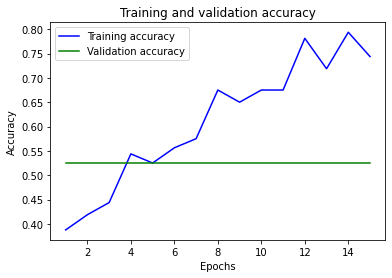

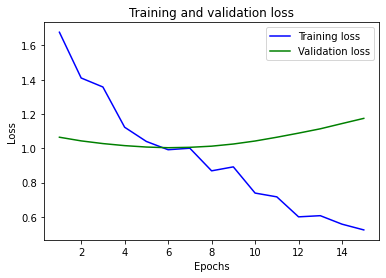

In [11]:
plot_history(history)

In [ ]:
df = pd.read_csv('comments.csv')
df